In [1]:
import numpy as np

In [2]:
from tracetools_analysis.ros_model import ApplicationFactory

In [5]:
trace_path = '~/.ros/tracing/e2e_demo1/ust'
# architecture_path = './architecture.json.template'
architecture_path = '../architecture1.json'

In [6]:
app = ApplicationFactory.create_from_json(architecture_path)

In [7]:
app.import_trace(trace_path, start_transition_ms=1000, end_transition_ms=1000)

found converted file: /home/zs/.ros/tracing/e2e_demo1/ust/converted
 [99%] [Ros2Handler]


In [8]:
list(app.comms)

In [30]:
print(app.comms[0].name)
print(app.comms[0].child[0].name)

/topic1_0
/topic1_dds_0


In [10]:
# node and comm
comm = app.comms[0]
dds = comm.child[0]

In [11]:
comm.name

'/topic1_0'

In [21]:
dds.name

'/topic1_dds_0'

In [22]:
import matplotlib.pyplot as plt

In [23]:
def label(path):
    return 'max: {} ms, {}'.format(path.max_ms, path.name)

In [24]:
comm.get_stats()

{'unit': 'ms',
 'min': 0.077056,
 'max': 0.347136,
 'median': 0.25728,
 'mean': 0.24783644444444441,
 'send': 135,
 'lost': 0}

In [25]:
dds.get_stats()

{'unit': 'ms',
 'min': 0.033791999999999996,
 'max': 0.233728,
 'median': 0.174336,
 'mean': 0.1645037037037037,
 'send': 135,
 'lost': 0}

Text(0, 0.5, 'Probability')

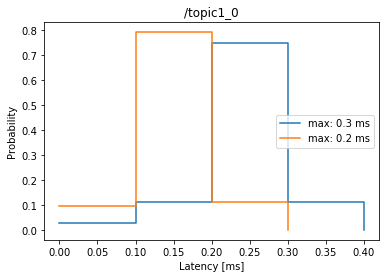

In [26]:
latency_ms, hist = comm.hist(binsize_ns=100000).get_xy()
max_ms = comm.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:0.1f} ms'.format(max_ms), where='post')

latency_ms, hist = dds.hist(binsize_ns=100000).get_xy()
max_ms = dds.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:0.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.title(comm.name)
plt.xlabel('Latency [ms]')
plt.ylabel('Probability')

Text(0, 0.5, 'Latency [ms]')

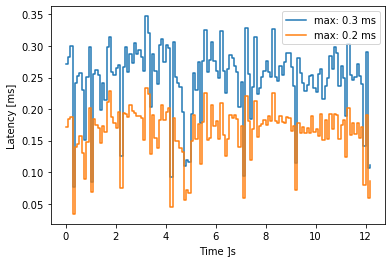

In [27]:
system_time_ns, latency_ns = comm.timeseries.get_xy()
time = (system_time_ns - system_time_ns[0]) * 1.0e-9
latency_ms = latency_ns * 1.0e-6
max_ms = comm.get_stats()['max']
plt.step(time, latency_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

system_time_ns, latency_ns = dds.timeseries.get_xy()
time = (system_time_ns - system_time_ns[0]) * 1.0e-9
latency_ms = latency_ns * 1.0e-6
max_ms = dds.get_stats()['max']
plt.step(time, latency_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.xlabel('Time ]s')
plt.ylabel('Latency [ms]')